In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from cdasws import CdasWs
import numpy as np

Variable names: ['V1800']


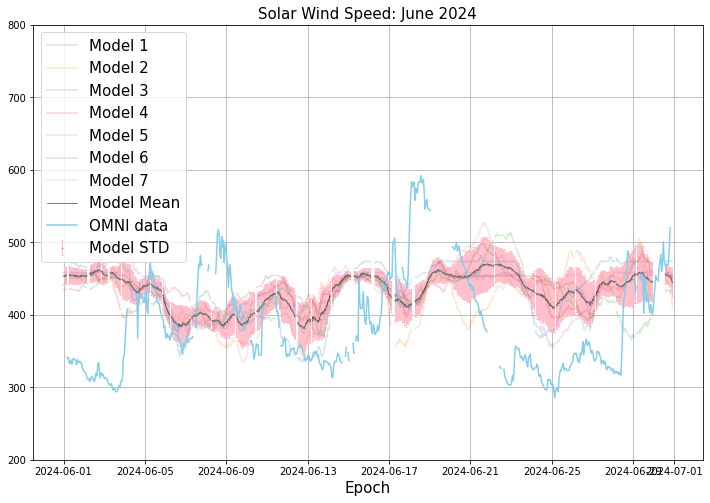

In [5]:
May_data = pd.read_csv("June.csv")
df = May_data

cdas = CdasWs()

dataset = 'OMNI2_H0_MRG1HR'
var_names = ['V1800']
print('Variable names:', var_names)
interval = [datetime.datetime(2024,6,1,0),datetime.datetime(2024,7,1,0)]
status, data = cdas.get_data(dataset, var_names, time0 = interval[0],time1=interval[1])

# if 'spacepy' in str(type(data)):
#     #  see https://spacepy.github.io/datamodel.html
#     print(var_names[0], '=', data[var_names[0]])
#     print(data[var_names[0]].attrs)
# else:
#     #  see https://github.com/MAVENSDC/cdflib
#     print(var_names[0], '=', data.data_vars[var_names[0]].values)
#     print(data.data_vars[var_names[0]].attrs)

# print(data)

data['V1800'][data['V1800']>1000]=np.nan

df['date'] = pd.to_datetime(df['date'])

df['mean_forecast'] = df[[f'forecast_{i}' for i in range(1, 8)]].mean(axis=1)
df['std_forecast'] = df[[f'forecast_{i}' for i in range(1, 8)]].std(axis=1)

# 创建图表
plt.figure(figsize=(12, 8))

# 画出date与forecast_1到forecast_7的图
for i in range(1, 8):
    plt.plot(df['date'], df[f'forecast_{i}'], label=f'Model {i}', alpha=0.2)

plt.plot(df['date'], df['mean_forecast'], color='black', label='Model Mean', linewidth=0.5)

plt.errorbar(df['date'], df['mean_forecast'], yerr=df['std_forecast'], fmt='o', markersize=0.5 ,
             ecolor='pink', elinewidth=1, capsize=1, label='Model STD')

plt.plot(data['Epoch_1800'],data['V1800'],color='skyblue',label='OMNI data')
plt.xlabel('Epoch',fontsize=15)
plt.title('Solar Wind Speed: June 2024',fontsize=15)
plt.legend(fontsize=15)
plt.ylim(200,800)


plt.grid(True)
plt.savefig('forecast_June_24.png',dpi=200)
plt.savefig('forecast_June_24.pdf',dpi=200);

Variable names: ['V1800']


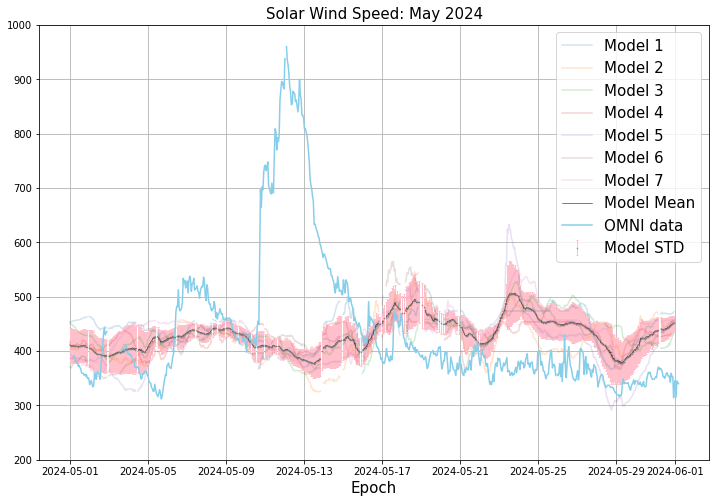

In [6]:
May_data = pd.read_csv("May.csv")
df = May_data

cdas = CdasWs()

dataset = 'OMNI2_H0_MRG1HR'
var_names = ['V1800']
print('Variable names:', var_names)
interval = [datetime.datetime(2024,5,1,0),datetime.datetime(2024,6,1,0)]
status, data = cdas.get_data(dataset, var_names, time0 = interval[0],time1=interval[1])

# if 'spacepy' in str(type(data)):
#     #  see https://spacepy.github.io/datamodel.html
#     print(var_names[0], '=', data[var_names[0]])
#     print(data[var_names[0]].attrs)
# else:
#     #  see https://github.com/MAVENSDC/cdflib
#     print(var_names[0], '=', data.data_vars[var_names[0]].values)
#     print(data.data_vars[var_names[0]].attrs)

# print(data)

data['V1800'][data['V1800']>1000]=np.nan

df['date'] = pd.to_datetime(df['date'])

df['mean_forecast'] = df[[f'forecast_{i}' for i in range(1, 8)]].mean(axis=1)
df['std_forecast'] = df[[f'forecast_{i}' for i in range(1, 8)]].std(axis=1)

# 创建图表
plt.figure(figsize=(12, 8))

# 画出date与forecast_1到forecast_7的图
for i in range(1, 8):
    plt.plot(df['date'], df[f'forecast_{i}'], label=f'Model {i}', alpha=0.2)

plt.plot(df['date'], df['mean_forecast'], color='black', label='Model Mean', linewidth=0.5)

plt.errorbar(df['date'], df['mean_forecast'], yerr=df['std_forecast'], fmt='o', markersize=0.5 ,
             ecolor='pink', elinewidth=1, capsize=1, label='Model STD')

plt.plot(data['Epoch_1800'],data['V1800'],color='skyblue',label='OMNI data')
plt.xlabel('Epoch',fontsize=15)
plt.title('Solar Wind Speed: May 2024',fontsize=15)
plt.legend(fontsize=15)
plt.ylim(200,1000)


plt.grid(True)
plt.savefig('forecast_May_24.png',dpi=200)
plt.savefig('forecast_May_24.pdf',dpi=200);